# Anime Analysis
--- 

<a id="topOfPage"></a>
## Table of Contents

### Guy's Analysis

1. [Task 1 - Analysis Pipeline](#task1)
2. [Task 2 - Method Chaining and writing Python programs](#task2)
3. [Task 3 - Exploratory Data Analysis](#task3)
    - [Advanced Data Analytics](#advanced_data_analytics)
    - [Correlation Map](#corr_map)
    - [Pie Chart](#pie)
    - [Bar Chart](#avg_episodes_per_rating)
4. [Task 4 - Finish Analysis to Answer Research Questions](#task4)
    - [Occurrence of Source Material and Rating](#source_and_rating)
    - [How a Rating Effects the Score of an Anime](#score_ratings)
5. [Conclusion](#conclusion)

### Jia Quan's Analysis
1. [Task 1 - Analysis Pipeline](#jq_loaddata)
2. [Task 2 - Done with Guy](#task2)
3. [Task 3 - Exploratory Data Analysis](#jq_task3)
4. [Task 4 - Finish Analysis to Answer Research Questions](#jq_task4)
    - [What is the most adapted source material for Anime?](#q1)
    - [What is the most popular genre in Anime?](#q2)
    - [How does the length of an anime affect the completion rate of the anime?](#q3)
    - [Does the Score affect how many people drop the anime's (Dropped / Members Ratio)](#q4)
    - [Which Studios has the highest Score averaged?](#q5)
5. [Conclusion](#jq_conclusion)

**Note:** Due to repetition on some analysis, we have removed them in the combined notebook. However, we both conducted in-depth Exploratory Data Analysis when completing milestone two.

---


<a id="task1"></a>
# Task 1. Set up an Analysis Pipeline 

## Introduction

Anime is a passion within our group. Both my partner and I have been big anime fans for a while. With both of us having overlapping interests in anime, it was easy to choose anime for our research topic. 

In terms of the Analysis Pipeline, each member of our group is responsible for different research questions. I have been tasked to answer the following:

1. How does an anime's rating affect the average number of episodes produced, and which ratings tend to have the highest-scoring animes.
2. Find the correlation between the rating of the anime and the number of episodes produced: We want to see how the number of episodes of an anime affects its rating.

To ensure the successful completion of this project, my partner and I completed Task 1 and Task 2 together. We participated in peer programming techniques to ensure we both set up promising analysis pipelines. Additionally, we made sure the method chaining works so the data is processed correctly, and other attributes from project_functions are used properly.


In [47]:
#Import depedancies

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline
sys.path.append('../scripts/')
import project_functions as pf
from pandas_profiling import ProfileReport
pd.options.mode.chained_assignment = None

## Set the Theme

In [48]:
sns.set_theme(style = 'white', font_scale = 1.2)

<a id="task2"></a>
# Task 2. The Method Chaining and Scripts Folder

All the data wrangling, Python functions, and our approach for method chaining in this Exploratory Data Analysis can be found under the `analysis -> scripts -> project_functions.py` file. 

<a id='task3'></a>
# Task 3. Exploratory Data Analysis (EDA) 

My partner and I both completed an EDA independently to answer our independent research questions. However, along the way we informed kept each other informed about all of our discoveries. In turn, this enabled both of us to learn more about our dataset. 

## Loading the Clean Data Using the `load_and_process` Attribute From the `project_functions.py.`


In [49]:
anime_df = pf.load_and_process(pd.read_csv('../../data/raw/anime.csv'))

In [50]:
# Source: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
anime_df.convert_dtypes().dtypes

Name              string
Score            Float64
Genres            string
Type              string
Episodes           Int32
Aired             string
Premiered         string
Studios           string
Source            string
Duration          string
Rating            string
Ranked             Int64
Popularity         Int64
Members            Int64
Favorites          Int64
Watching           Int64
Completed          Int64
On-Hold            Int64
Dropped            Int64
Plan to Watch      Int64
dtype: object

### Observation 1.
Prior to starting the EDA, there were three key variable typings which did not make sense. They were:

Before starting the EDA, three key variable typings did not make sense. They were:

1. "Episodes" as type string.
2. "Ranked" as type string.
3. "Score": as type string.  

Printing out the data types allows me to confirm that the method chaining worked properly, and each of the three types converted into a numerical value to be put to proper use later.

## Preliminary Data Processing

I began my EDA by generating some simple numerical statistics for our dataset to get comfortable with it.

In [51]:
anime_df.info()
anime_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           3310 non-null   object 
 1   Score          3310 non-null   float64
 2   Genres         3310 non-null   object 
 3   Type           3310 non-null   object 
 4   Episodes       3310 non-null   int32  
 5   Aired          3310 non-null   object 
 6   Premiered      3310 non-null   object 
 7   Studios        3310 non-null   object 
 8   Source         3310 non-null   object 
 9   Duration       3310 non-null   object 
 10  Rating         3310 non-null   object 
 11  Ranked         3310 non-null   float64
 12  Popularity     3310 non-null   int64  
 13  Members        3310 non-null   int64  
 14  Favorites      3310 non-null   int64  
 15  Watching       3310 non-null   int64  
 16  Completed      3310 non-null   int64  
 17  On-Hold        3310 non-null   int64  
 18  Dropped 

,Name,Score,Genres,Type,Episodes,Aired,Premiered,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800
1,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918
2,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719
3,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394
4,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,Gallop,Manga,23 min. per ep.,PG-13 - Teens 13 or older,604.0,1003,148259,2066,13907,78349,14228,11573,30202


In [52]:
anime_df.shape

(3310, 20)

### Preliminary Notes:

- Our data contains 3310 entries with 20 columns.
- The row count has reduced significantly from the original of 17562.
- We have cleaned up our data, so there are no NaN values.
- There are three different metrics to look at when deciding the best anime. They are: 
    - Score.
    - Popularity.
    - Ranked.


## Continuing Exploring the Dataset

In [53]:
anime_df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Score,3310.0,6.987728,0.779368,2.18,6.50,7.02,7.50,9.19
Episodes,3310.0,26.906042,54.207853,3.00,12.00,13.00,26.00,1818.00
Ranked,3310.0,3960.247130,2775.802565,1.00,1581.50,3567.50,5884.50,11073.00
Popularity,3310.0,3396.008157,2972.224013,1.00,1029.25,2528.00,4956.75,12953.00
Members,3310.0,135995.741088,249036.962986,363.00,9742.75,40327.50,144434.25,2589552.00
Favorites,3310.0,2088.334743,8679.519580,0.00,22.00,141.00,834.00,183914.00
Watching,3310.0,9873.740483,26360.309218,12.00,521.25,2424.50,9110.50,566239.00
Completed,3310.0,85777.196979,184725.908578,0.00,3766.75,18858.50,77253.00,2182587.00
On-Hold,3310.0,4309.558006,8282.962858,4.00,385.00,1549.00,4878.25,130961.00
Dropped,3310.0,5498.948943,9226.782956,16.00,568.25,2212.00,6945.00,174710.00


In [54]:
anime_df.describe(exclude = [np.number]).T

,count,unique,top,freq
Name,3310,3310,Cowboy Bebop,1
Genres,3310,2079,"Slice of Life, Comedy",41
Type,3310,1,TV,3310
Aired,3310,2546,"Oct 5, 2016 to Dec 21, 2016",9
Premiered,3310,203,Fall 2016,67
Studios,3310,489,Toei Animation,164
Source,3310,15,Manga,1299
Duration,3310,39,24 min. per ep.,1384
Rating,3310,5,PG-13 - Teens 13 or older,2009


### More Notes:

- The most frequently appearing anime genre combination is Slice of Life, Comedy.
- The season Fall 2016 contained the most anime premiers, with 67 animes released that season.
- The most famous anime source is Manga. 
- The most common rating is PG-13 - Teens 13 or older.
- Toei Animation is the most popular studio.
- The minimum number of members watching an anime currently is 12. This means that everyone who has an account on MyAnimeList is currently watching some anime.
- The mean value is greater than the median value of each column except score. 


<a id='advanced_data_analytics'></a>
## Advanced Data Analytics

In [ ]:
ProfileReport(anime_df, title = "Pandas Profiling Anime Report").to_notebook_iframe()

<a id='corr_map'></a>
## Creating a Correlation Heatmap to Represent Correlation Between Different Variables 

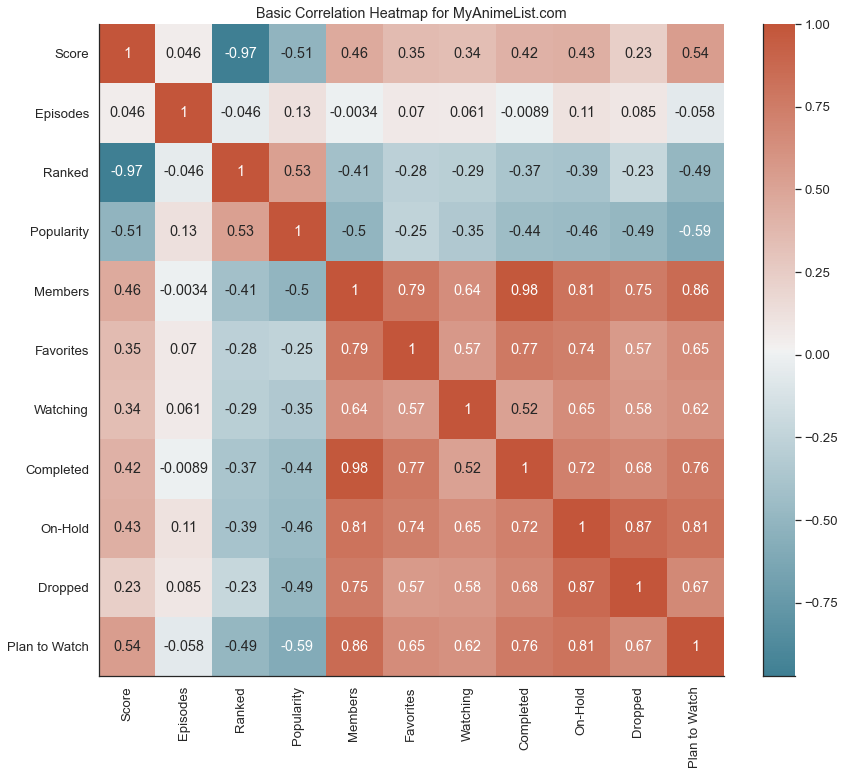

In [55]:
# Source: https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

plt.subplots(figsize = (14, 12))
corr = anime_df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True))
plt.title("Basic Correlation Heatmap for MyAnimeList.com")
sns.despine()

### Correlation Heatmap Analysis:

Here are some interesting observations deduced from the correlation map

The first observation to note is there is no association between the number of episodes created and the anime's score. This is convenient as this answers our first research question. We wanted to see what happens to an anime's score the more episodes produced. With the correlation value being 0.046, we do not have any association. 

As stated earlier, the three key metrics to assessing how good an anime are score, popularity, rank. The correlation value between the number of episodes and popularity is 0.13. This means there is no association between the number of episodes and the popularity of an anime. 

Lastly, the correlation value between episodes and ranked is -0.046. Again this means there is no association between the number of episodes and the rank of an anime. 

One last note. The highest negative correlation is between the Score and Ranked columns, with a correlation value of -0.97. This value makes sense because the higher the score of an anime, the lower the ranking it will have. As a result, we can use this information to further cement that the number of episodes does not affect the score and ranking an anime receives. This means that just because an anime has many episodes, it does not necessarily imply it is a good anime and vice versa. 


<a id='pie'></a>
## Visualizing the Distribution of All Anime Ratings

In [56]:
ratings = sorted(anime_df['Rating'].unique().tolist())
ratingsCount = anime_df.groupby('Rating')['Name'].count().reset_index(drop = False).sort_values(by = 'Rating', ascending = True)
ratingsCountList = ratingsCount['Name'].tolist()

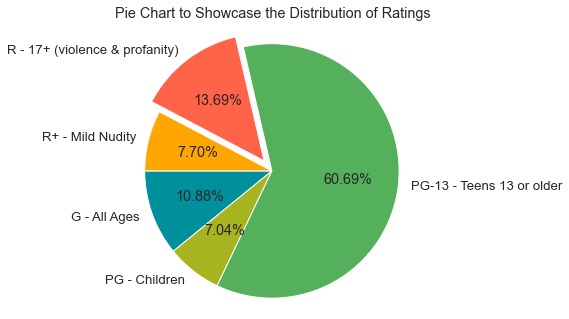

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
chartExplode = (0, 0, 0, 0.1, 0)
chartColors = ['#008f9c','#a7b31f','#55b05b','#ff6449', '#ffa600']
ax.pie(ratingsCountList, labels = ratings, shadow = False, startangle = 180, explode = chartExplode, autopct='%1.2f%%', colors = chartColors)
ax.axis('equal')
ax.set_title("Pie Chart to Showcase the Distribution of Ratings")
plt.show()

### Pie Chart Analysis 

As can be seen, by this pie chart, the most common anime rating is PG - 13 - Teens or older, with almost 2/3s of all animes fitting in this category. The second most popular rating is R - 17+ at 13.69%. Finally, the last three are all within 3% of each other. Overall, this pie chart provides a nice visual and tells anime newcomers that most of the shows they will watch will most likely have the rating of PG - 13 - Teens or older. 

<a id='avg_episodes_per_rating'></a>
## Which Ratings Tend to Average the Most Anime Episodes Produced

In [58]:
ratingVsEpisodes_df = anime_df.groupby('Rating', as_index = False)['Episodes'].mean().sort_values(by = 'Episodes', ascending = False)
ratingVsEpisodes_df 

,Rating,Episodes
1,PG - Children,53.098712
0,G - All Ages,51.661111
2,PG-13 - Teens 13 or older,22.743156
3,R - 17+ (violence & profanity),17.609272
4,R+ - Mild Nudity,17.337255


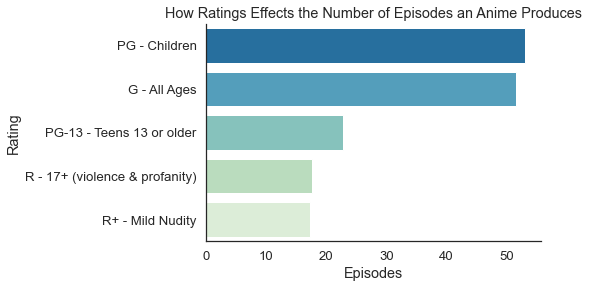

In [59]:
sns.barplot(y = 'Rating', x = 'Episodes', data = ratingVsEpisodes_df, palette = "GnBu_r")
plt.title("How Ratings Effects the Number of Episodes an Anime Produces")
sns.despine()

### Bar Chart Analysis 

Looking at the bar chart, we can see that the rating PG-13 - Teens 13 or older, R - 17+ (violence & profanity), R+ - Mild Nudity tend to produce a comparable number of episodes. And the anime rating which makes the most episodes are PG - Children and G- All Ages. This tells us that the more mature the anime content, the fewer episodes that anime series produce. It would be worth exploring further why that is the case. 

<a id='task4'></a>
# Task 4. Conduct Analysis to Help Answer Research Questions


<a id='source_and_rating'></a>
## Visualizing the Most Popular Rating Based on Source Material

In [60]:
# need to get rid of anything that says picture book, radio, book, card game, music, Digital Manga 

sourceAndRating_df = anime_df[anime_df.Source != 'Picture book']
sourceAndRating_df = sourceAndRating_df[sourceAndRating_df.Source != 'Radio']
sourceAndRating_df = sourceAndRating_df[sourceAndRating_df.Source != 'Card game']
sourceAndRating_df = sourceAndRating_df[sourceAndRating_df.Source != 'Music']
sourceAndRating_df = sourceAndRating_df[sourceAndRating_df.Source != 'Digital manga']
sourceAndRating_df = sourceAndRating_df[sourceAndRating_df.Source != 'Book']

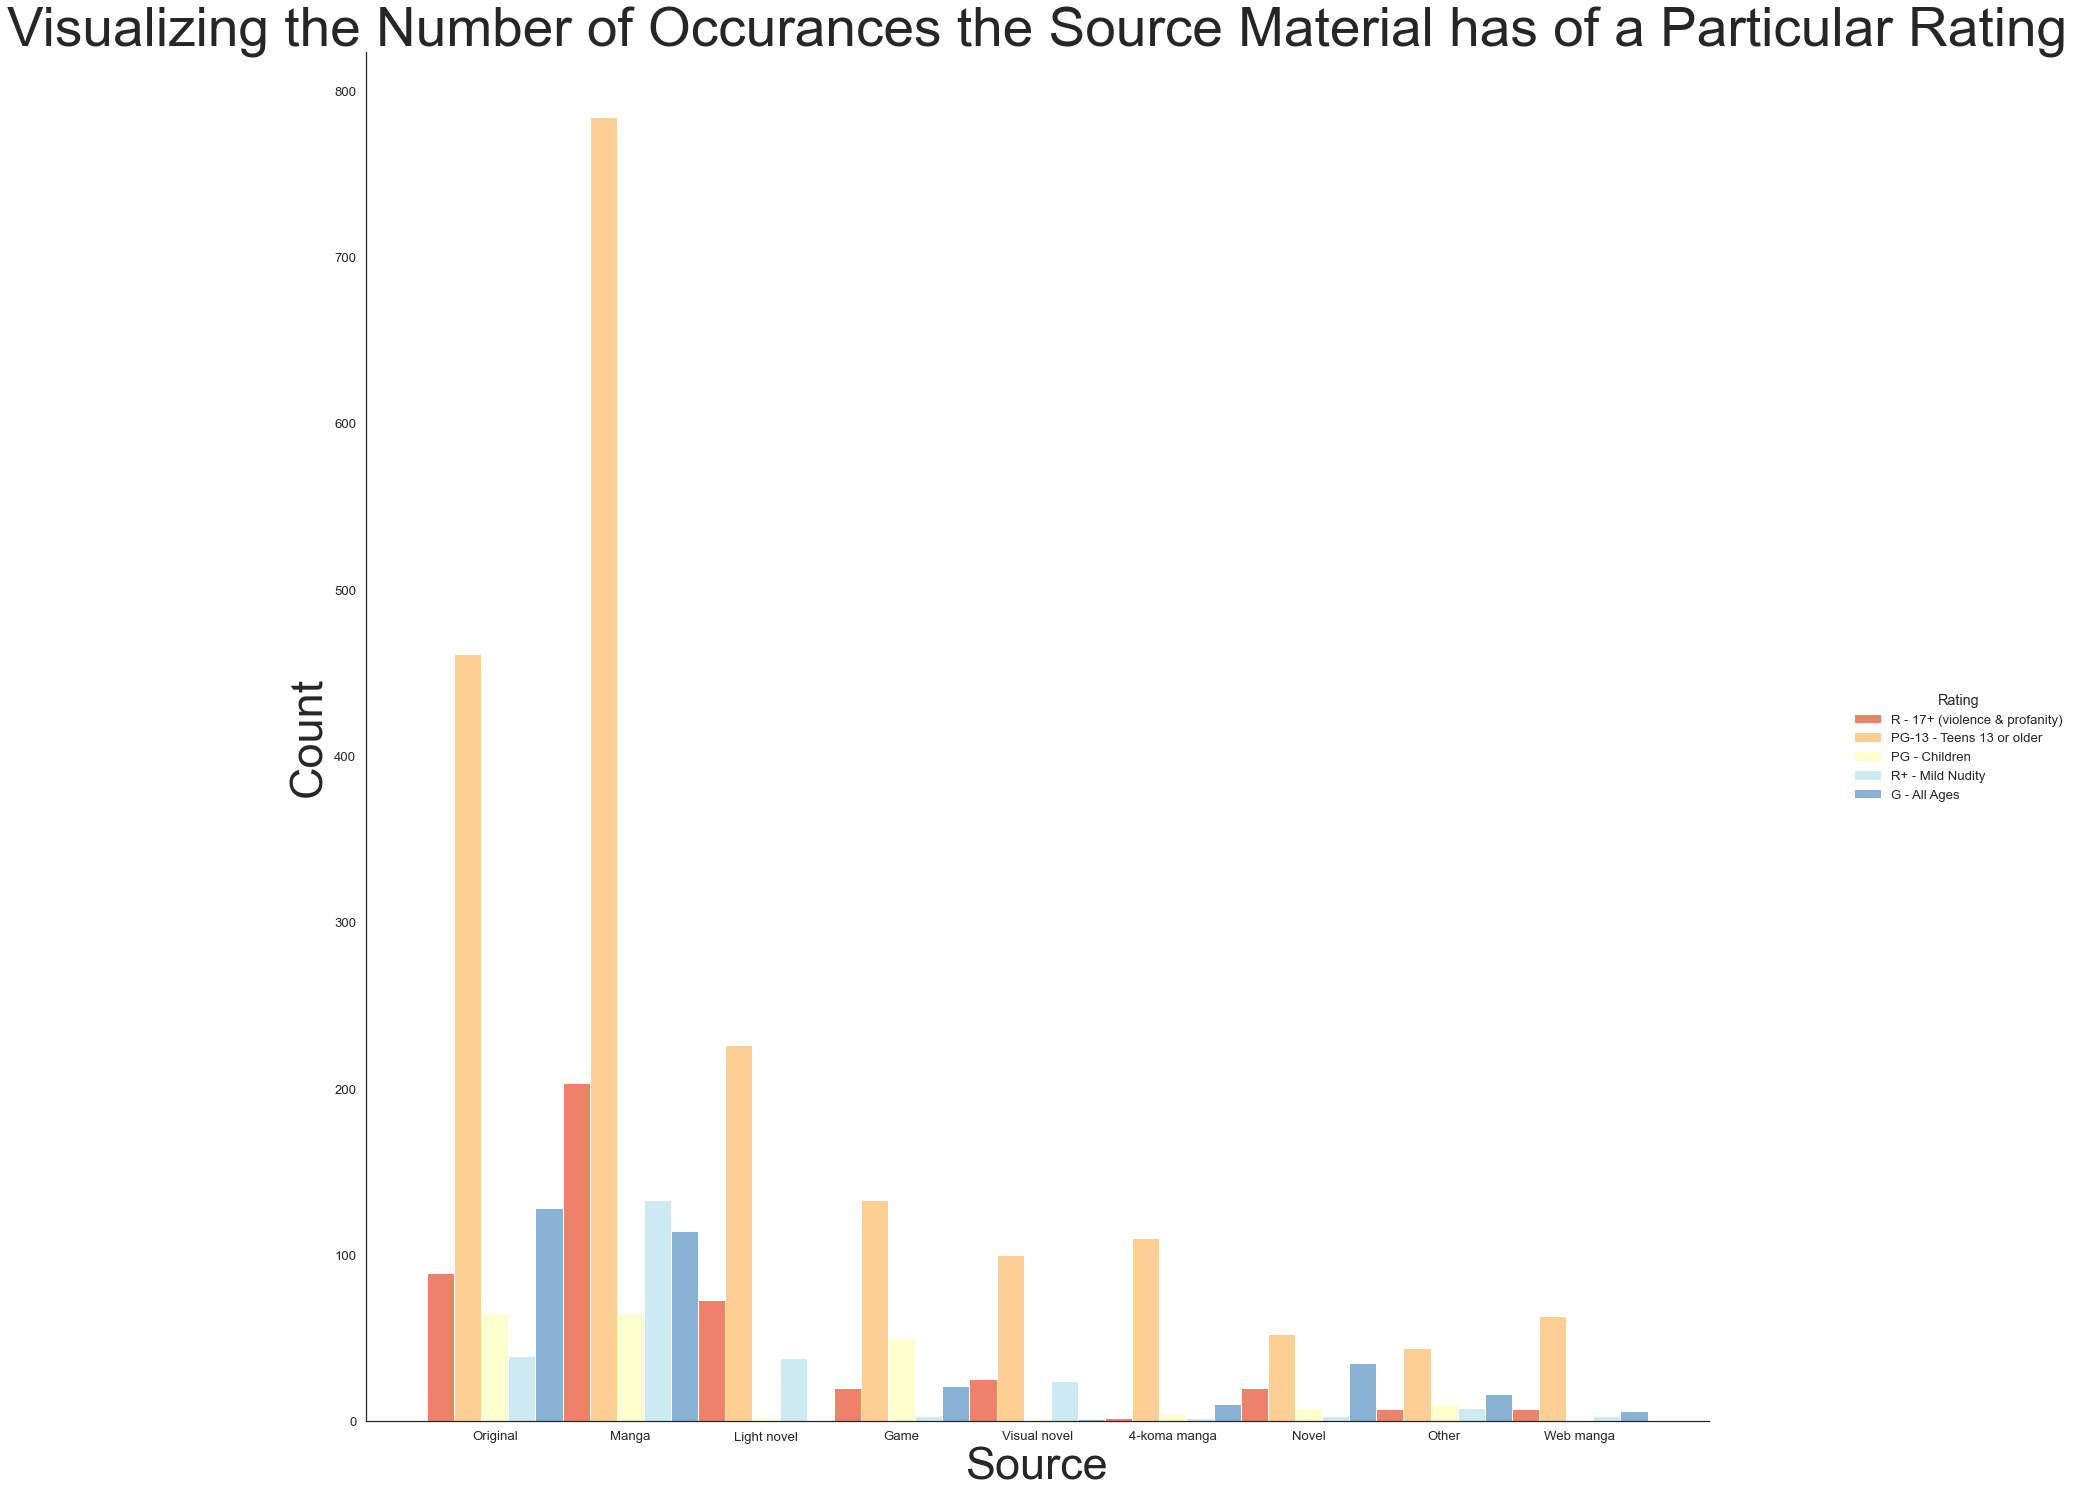

In [61]:
sns.displot(data = sourceAndRating_df, x = 'Source', kind = 'hist', height = 20, bins = 18, hue = 'Rating', multiple = 'dodge', binwidth = 3, palette = 'RdYlBu')
plt.title("Visualizing the Number of Occurances the Source Material has of a Particular Rating", fontsize = 55)
plt.xlabel("Source", fontsize = 45)
plt.ylabel("Count", fontsize = 45)
sns.despine()

### Histogram Analysis

Based on the histogram plot above, the source of anime series targets the "PG - 13 Teens 13 or older" rating. This makes sense as we saw in our pie chart that it is the most popular rating. Thus, now we further understand why most anime series fit in this rating, and it is because the source material is made of the "PG - 13 Teens 13 or older" crowd. One more thing to note, we saw earlier Manga is the most popular anime source. The most popular rating produced from mangas is again made for the "PG - 13 Teens 13 or older" crowd. As a result, this doubly adds that the most popular anime source, which the animes are based on, tends to have ratings of "PG - 13 Teens 13 or older". Thus, it makes sense that anime fit that rating.

<a id='score_ratings'></a>
## The Average Anime Score Each Rating Produces


In [ ]:
ratingScores_df = anime_df.groupby('Rating', as_index = False)['Score'].mean().sort_values(by = 'Score', ascending = False).reset_index(drop = True)
ratingScores_df

In [ ]:
plt.subplots(figsize = (10, 10))
sns.stripplot(x = 'Score', y = 'Rating', data = anime_df, color = 'black', jitter = True, size = 2, palette = 'cool')
sns.boxplot(x = 'Score', y = 'Rating', data = anime_df, palette = "gist_ncar_r")
plt.title("Box plot of the Average Anime Score Each Rating Produces", fontsize = 20)
sns.despine()

### Boxplot Analysis

To end, we can answer the last research question: "Which ratings tend to have the highest-scoring animes.". Well, we took the average score produced by each rating and get the following results. 

- R-17+ (violence & profanity) averages the highest scores (the attack on titan fans are cheering on right now). However, something to observe from this rating is that it seems to have the second most outliers on the tail end. This could mean that most anime ratings for that category will tend to have a well-received rating

- The PG-13 - Teens 13 or older, and most popular rating found earlier has the second-largest rating. Moreover, they have the most amount of outliers in the tail end of the boxplot. Which could mean that if we remove all the outliers, they could produce higher score averages than the R-17+ rating. 

- The last three ratings tend to have similar averages with very few outliers. 

<a id='conclusion'></a>
# Conclusion

After all of this data collection, we have found out a lot about anime ratings. We saw that the most popular anime rating is "PG-13 - Teens 13 or older". Currently, 60.69% of all animes will fit that rating. This is partly because out of all the source material, the " PG-13 - Teens 13 or older" rating is the most popular rating for each source category. The most compelling evidence is that in the most popular source material, Manga, the "PG-13 - Teens 13 or older" significantly outpaces any other rating produced in that source material. They further cement why the "PG-13 - Teens 13 or older" is predominant from the all-current anime series.

However, it is interesting to note that the average number of episodes produced by the "PG-13 - Teens 13 or older" rating ranks in the middle of all the five ratings. Additionally, the "PG-13 - Teens 13 or older" only has the second-highest average score of anime series produced. It was just trailing slightly behind the R-17+ rating. But, something to keep in mind is that there are a lot of outliers for this data. Which could mean if we remove them, it could overtake the R-17+ rating.

To end our analysis, we also found out the number of episodes an anime produces will not affect the anime's rating. When comparing the correlation between the number of episodes and the three critical metrics of score, popularity, and ranked, there was no association. 

---

[Back to the Top](#topOfPage)

---

<a id="jq_loaddata"></a>
# Jia Quan Wee's Analysis

In [37]:
# Method Chaining
# Loading data
df = pd.read_csv('../../data/raw/anime.csv')

#load and process
pdf = pf.load_and_process(df)
pdf.head()

,Name,Score,Genres,Type,Episodes,Aired,Premiered,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800
1,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918
2,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719
3,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394
4,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,Gallop,Manga,23 min. per ep.,PG-13 - Teens 13 or older,604.0,1003,148259,2066,13907,78349,14228,11573,30202


In [6]:
# writing clean data to the correct directory
pdf.to_csv('../../data/processed/clean_anime.csv', index=False)

pdf = pd.read_csv('../../data/processed/clean_anime.csv')

<a id="jq_task3"></a>
# Task 3: EDA


## Exploring The Data


In [7]:
pdf.nunique(axis = 0)

Name             3310
Score             408
Genres           2079
Type                1
Episodes          153
Aired            2546
Premiered         203
Studios           489
Source             15
Duration           39
Rating              5
Ranked           2867
Popularity       2805
Members          3256
Favorites        1340
Watching         2609
Completed        3153
On-Hold          2456
Dropped          2589
Plan to Watch    3149
dtype: int64

In [20]:
pdf.isnull().sum()

Name             0
Score            0
Genres           0
Type             0
Episodes         0
Aired            0
Premiered        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
dtype: int64

In [39]:
pdf.sample()

,Name,Score,Genres,Type,Episodes,Aired,Premiered,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
1470,Shugo Chara! Party!,6.62,"Comedy, Magic, School, Shoujo",TV,25,"Oct 3, 2009 to Mar 27, 2010",Fall 2009,Satelight,Manga,21 min. per ep.,PG - Children,5297.0,1972,61590,278,1785,43498,1654,4066,10587


In [14]:
pdf.memory_usage( )

Index              128
Name             26480
Score            26480
Genres           26480
Type             26480
Episodes         26480
Aired            26480
Premiered        26480
Studios          26480
Source           26480
Duration         26480
Rating           26480
Ranked           26480
Popularity       26480
Members          26480
Favorites        26480
Watching         26480
Completed        26480
On-Hold          26480
Dropped          26480
Plan to Watch    26480
dtype: int64

## Observations 

- There are 3310 unique entries on the `Name` column.
- There are a total of 489 Studios.
- There are five different kinds of ratings.
- The `index` column uses the least amount of memory.
- We cleaned that data so that no entries have any missing values.
- There is only one `Type` of anime, and that is `TV`.


<a id="jq_task4"></a>
# Task 4. Conduct Analysis to Help Answer Research Questions


<a id="q1"></a>
## Research Questions

1. What is the most adapted source material for Anime?
2. What is the most popular genre in Anime?
3. How does the number of episodes of an anime affect the completion rate (Dropped/Members Ratio) of the Anime
4. Does the Score affect how many people drop the Anime's (Dropped / Members Ratio)
5. Which Studios has the highest Score averaged?


## Question 1 - What is the Most Adapted Source Material for an `Anime`?


Text(0.5, 1.0, 'Most adapted source material')

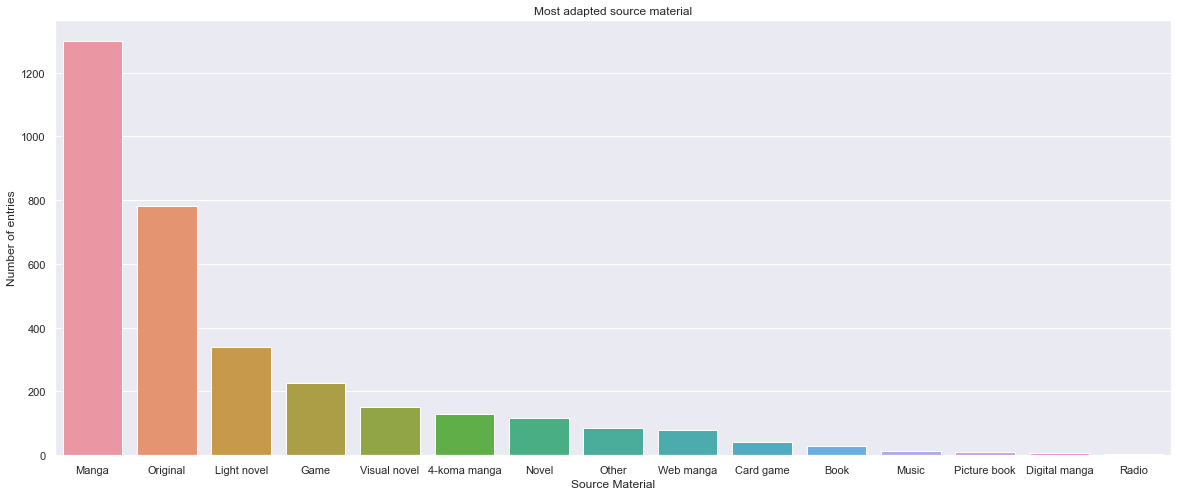

In [21]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))

ax = sns.countplot(x = 'Source',
              data = pdf,
              order = pdf['Source'].value_counts().index)

plt.xlabel("Source Material")
plt.ylabel("Number of entries")
plt.title("Most adapted source material")

### Question 1 Analysis

The most adapted material for an anime is from `Manga`, `Original`, and `Light novel`.

<a id="q2"></a>
## Question 2 - What is the Most Popular `Anime` Genre?


In [40]:
genreList = pf.returnList(pdf, 'Genres')
genreNumOccurances = pf.countOccurances(genreList)
genreIndividualOccurances = pf.countWordsInDict(genreNumOccurances)

xd = pd.DataFrame(genreIndividualOccurances.items(), columns=['Genre', 'Count'])

xd = xd.sort_values(by=['Count'], ascending=False)

xd.head()
    

,Genre,Count
2,Comedy,935
0,Action,792
3,Drama,601
14,Romance,545
11,Fantasy,532


Text(0.5, 1.0, 'Top Genre')

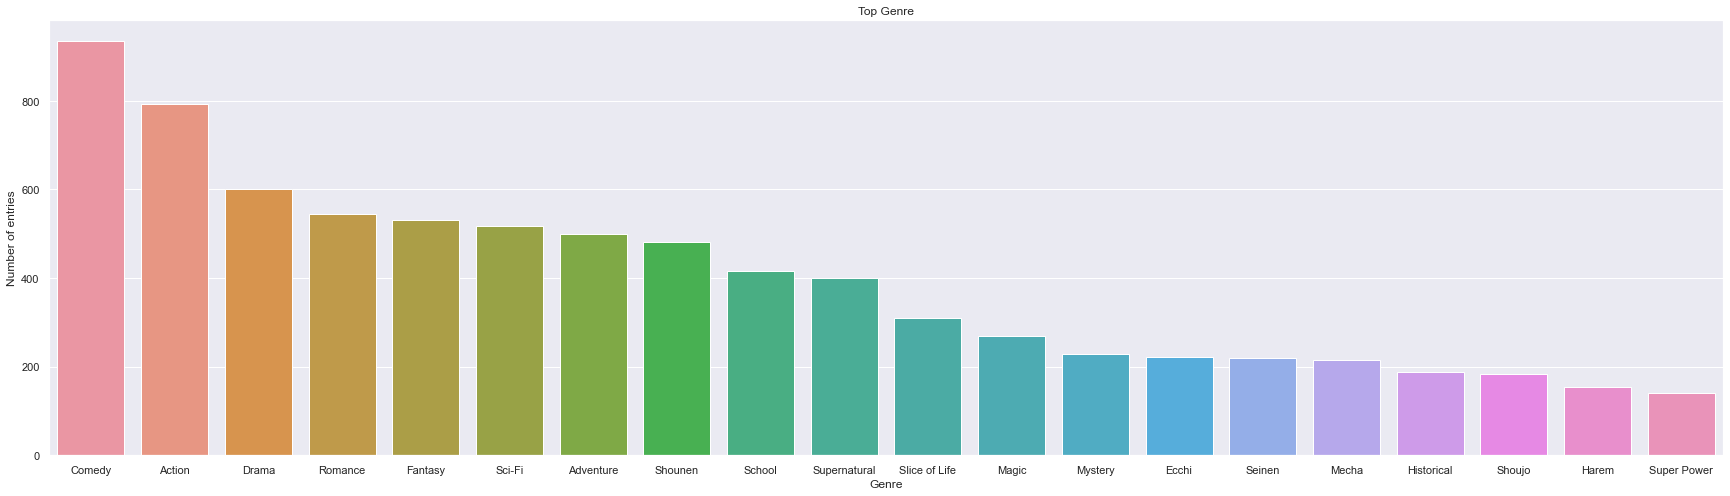

In [41]:
plt.figure(figsize=(30,8))

ax = sns.barplot(x = 'Genre', y = 'Count', data = xd.head(20))

plt.xlabel("Genre")
plt.ylabel("Number of entries")
plt.title("Top Genre")

### Question 2 Analysis

We can see the top `Genre` chart sorted by `descending` order based on the graph above. The top five most commonly appearing `Genres` are `Comedy,` `Action,` `Drama,` `Romance,` and `Fantasy.`


<a id="q3"></a>
## Question 3 - How does the Length of an Anime Affect the Completion Rate of the Anime?


In [43]:
q2df = pdf[['Name','Episodes','Members','Dropped']]
q2df['Dropped / Members Ratio'] = q2df['Dropped'] / q2df['Members']
q2df = q2df.sort_values(by=['Dropped / Members Ratio'], ascending=False)
q2df.head(10)

,Name,Episodes,Members,Dropped,Dropped / Members Ratio
3107,Ex-Arm,12,46649,14271,0.305923
2679,The Reflection,12,26983,7807,0.289330
1223,Penguin no Mondai,100,641,185,0.288612
3167,Hakata Mentai! Pirikarako-chan,12,2360,677,0.286864
2486,Shounen Ashibe: Go! Go! Goma-chan,32,2568,732,0.285047
2639,100% Pascal-sensei (TV),36,2220,628,0.282883
2076,Hero Bank,51,2571,727,0.282769
963,MapleStory,25,4257,1180,0.277191
2547,Time Bokan 24,24,4134,1123,0.271650
2494,Endride,24,61776,16759,0.271287


With focus on the number of `Dropped` instead.

The number of people dropping (`Dropped`) the anime is high but so is the number of people watching it (`Members`). Therefore we created a `Dropped/Members Ratio` to average it to a quantifiable number. Based on our observations, we believe there is no correlation between the number of `Episodes` and the number of users who `Dropped` the anime.

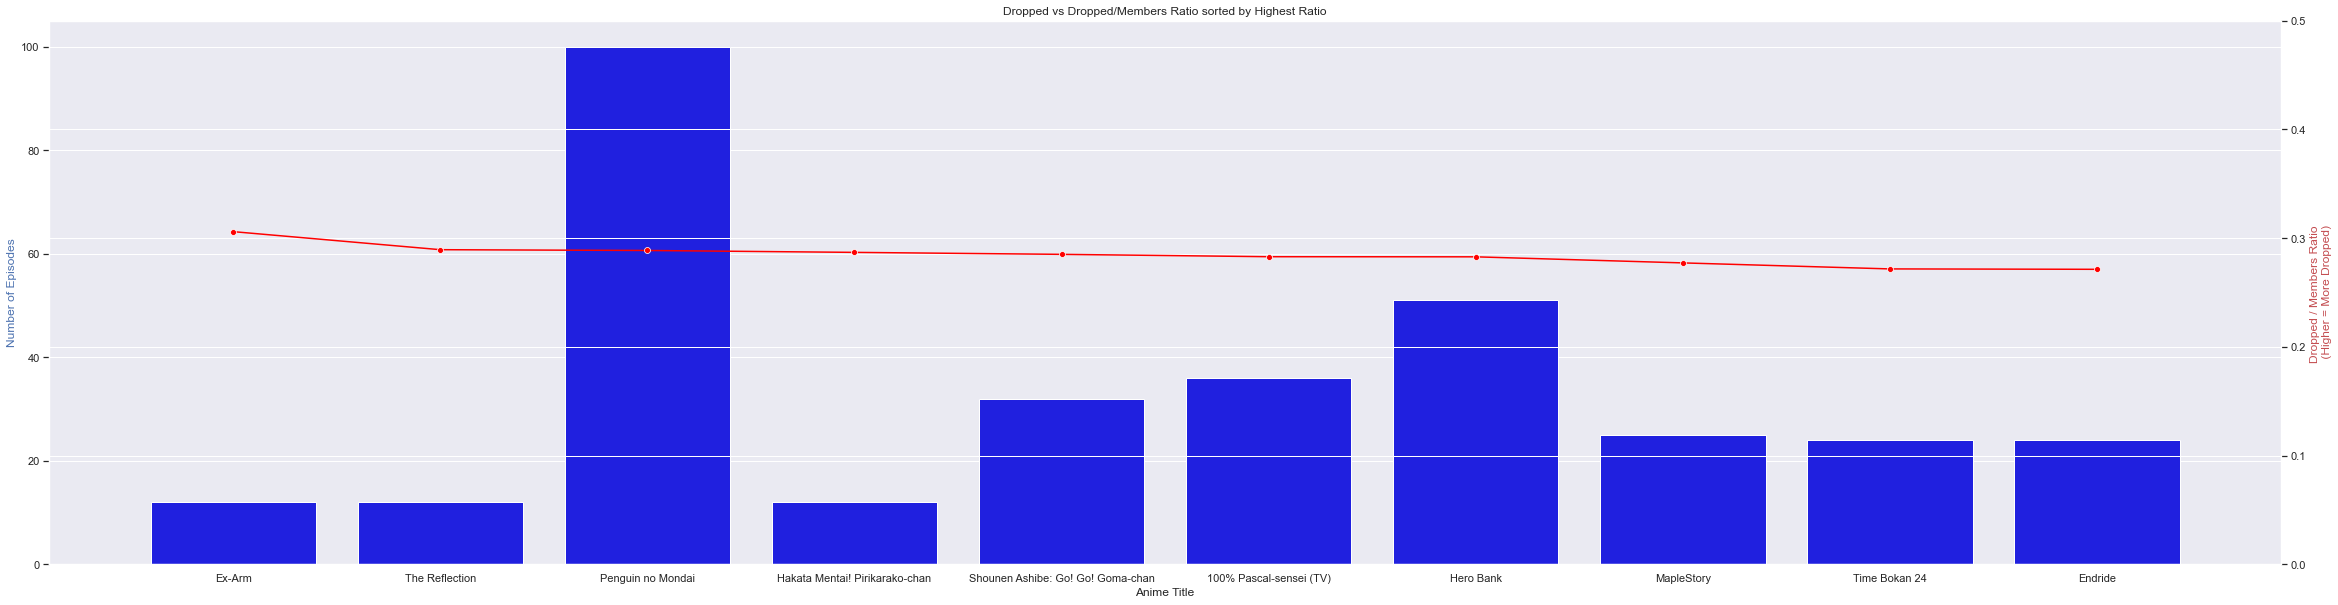

In [44]:
fig, ax1 = plt.subplots(figsize=(40,10)) # initializes figure and plots
ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.barplot(x = 'Name', y = 'Episodes', ax = ax1, color = 'blue', data = q2df.head(10)) # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = 'Name', y = 'Dropped / Members Ratio', marker = 'o', color = 'red', ax = ax2, data = q2df.head(10)) # plots the second set, and sets to ax2. 

# these lines add the annotations for the plot. 
plt.title("Dropped vs Dropped/Members Ratio sorted by Highest Ratio")
ax2.set_ylim(0,0.5)
ax1.set_xlabel('Anime Title')
ax1.set_ylabel('Number of Episodes', color='b')
ax2.set_ylabel('Dropped / Members Ratio \n (Higher = More Dropped)', color='r')

plt.show(); # shows the plot. 

Highest `Dropped/Members Ratio` sorts this graph, the blue bar is Number of Episodes and the red line is `Dropped/Members Ratio.` We can see that the correlation between number of episodes and the ratio of people who dropped the show is irrelevant because it fluctuates a lot.

In [45]:
q2df = pdf[['Name','Episodes','Members','Dropped']]
q2df['Dropped / Members Ratio'] = q2df['Dropped'] / q2df['Members']
# q2df = q2df.sort_values(by=['Dropped / Members Ratio'], ascending=False)

q2df = q2df.sort_values(by=['Dropped'], ascending=False)
q2df.head(10)


,Name,Episodes,Members,Dropped,Dropped / Members Ratio
182,Bleach,366,1286382,174710,0.135815
1439,Fairy Tail,175,1312470,148408,0.113075
740,Naruto: Shippuuden,500,1543765,124253,0.080487
9,Naruto,220,1830540,99806,0.054523
1725,Sword Art Online,25,2214395,90661,0.040942
2696,Black Clover,170,860404,89594,0.104130
653,Death Note,37,2589552,80834,0.031215
1966,Kill la Kill,24,1283021,67845,0.052879
2072,Sword Art Online II,24,1437210,67243,0.046787
1127,Soul Eater,51,1218423,65962,0.054137


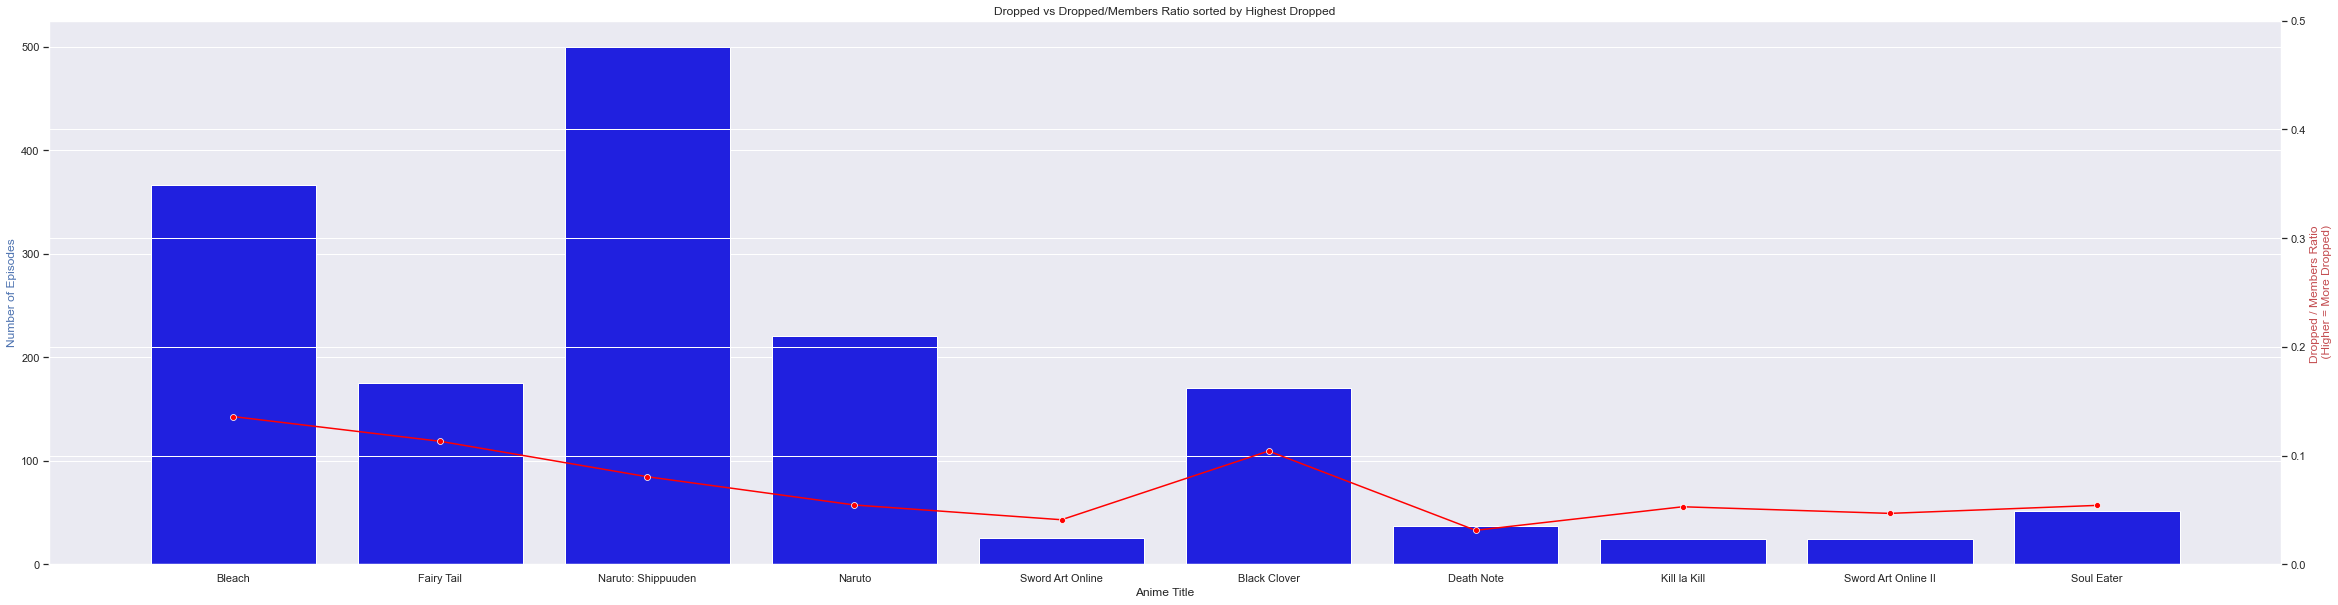

In [46]:
fig, ax1 = plt.subplots(figsize=(40,10)) # initializes figure and plots
ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.barplot(x = 'Name', y = 'Episodes', ax = ax1, color = 'blue', data = q2df.head(10)) # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = 'Name', y = 'Dropped / Members Ratio', marker = 'o', color = 'red', ax = ax2, data = q2df.head(10)) # plots the second set, and sets to ax2. 

# these lines add the annotations for the plot. 
plt.title("Dropped vs Dropped/Members Ratio sorted by Highest Dropped")
ax2.set_ylim(0,0.5)
ax1.set_xlabel('Anime Title')
ax1.set_ylabel('Number of Episodes', color='b')
ax2.set_ylabel('Dropped / Members Ratio \n (Higher = More Dropped)', color='r')

plt.show(); # shows the plot. 

We sorted this graph by the statistics of the Highest number of Dropped instead of ratio to see if the pattern remains the same. From the pattern, we can also see that the number of the episode does not affect the Dropped/Members Ratio.

### Question 3 Analysis

- Based on the research, we have found out that there's little to no correlation between the number of Episodes and `Dropped/Member Ratio.`

- Based on the top ten anime that was Dropped, we can see that the episode number does not play a significant role in it. Most of the anime in the top ten are in the standard 12 or 13 episode range.

- The higher the `Dropped/Members Ratio`, the more members dropped watching an anime.

- The number of episodes of an anime does not affect the completion rate as much as we initially thought it would be based on the `Dropped/Members Ratio.`


<a id="q4"></a>
## Question 4 - Does the `Score` Affect how Many People Drop an Anime Based on the `Dropped/Members Ratio`?

Formula for how the score is calculated is found [here](https://myanimelist.net/info.php?go=topanime)


In [ ]:
q4df = pdf[['Name','Members','Dropped','Score']]
q4df['Dropped / Members Ratio'] = q4df['Dropped'] / q4df['Members']
q4df = q4df.sort_values(by=['Dropped / Members Ratio'], ascending=False)
#q2df = q2df.sort_values(by=['Score'], ascending=True)
q4df.head()

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,5)) # initializes figure and plots
ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.barplot(x = 'Name', y = 'Score', ax = ax1, color = 'green', data = q4df.head()) # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = 'Name', y = 'Dropped / Members Ratio', marker = 'o', color = 'red', ax = ax2, data = q4df.head()) # plots the second set, and sets to ax2. 

# these lines add the annotations for the plot. 
plt.title("Dropped vs Dropped/Members Ratio sorted by Highest Dropped")
ax2.set_ylim(0,1)
ax1.set_ylim(0,10)
ax1.set_xlabel('Anime Title')
ax1.set_ylabel('Score', color='g')
ax2.set_ylabel('Dropped / Members Ratio \n (Higher = More Dropped)', color='r')

plt.show(); # shows the plot. 

In [ ]:
q4df = pdf[['Name','Members','Dropped','Score']]
q4df['Dropped / Members Ratio'] = q4df['Dropped'] / q4df['Members']
q4df = q4df.sort_values(by=['Dropped / Members Ratio'], ascending=True)
#q2df = q2df.sort_values(by=['Score'], ascending=True)
q4df.head()

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,5)) # initializes figure and plots
ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.barplot(x = 'Name', y = 'Score', ax = ax1, color = 'green', data = q4df.head()) # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = 'Name', y = 'Dropped / Members Ratio', marker = 'o', color = 'red', ax = ax2, data = q4df.head()) # plots the second set, and sets to ax2. 

# these lines add the annotations for the plot. 
plt.title("Dropped vs Dropped/Members Ratio sorted by Highest Dropped")
ax2.set_ylim(0,1)
ax1.set_ylim(0,10)
ax1.set_xlabel('Anime Title')
ax1.set_ylabel('Score', color='g')
ax2.set_ylabel('Dropped / Members Ratio \n (Higher = More Dropped)', color='r')

plt.show(); # shows the plot. 

### Question 4 Analysis

We found out that there's a strong correlation between Dropped/Members Ratio when compared with Score. The anime with a high Score usually have a low Dropped/Members Ratio, while anime with a low Score usually have a high Dropped / Members Ratio. This is because when an anime is terrible, people will rate it with a low score and usually stop watching it as they don't find any point in continuing.

<a id="q5"></a>
## Question 5 - Which `Studios` have the Highest Average `Score`?


In [ ]:
q5df = pdf[['Score','Studios']]
q5df2 = q5df.groupby(['Studios'], as_index=False)['Score'].mean().sort_values('Score', ascending=False).reset_index(drop=True)
q5df2


In [ ]:
plt.figure(figsize=(20,20))
boxOrder = q5df2['Studios'].head(20).tolist()
ax = sns.boxplot(x="Score", y="Studios", data=q5df, order=boxOrder)
plt.title("Scores sorted by Cumulative Scores")

Based on the graph, we can see that the top five Studios with the highest Score is

- `Madhouse, MAPPA` at `8.600`
- `J.C.Staff, Egg Firm` at `8.465`
- `Studio Bind` at `8.370`
- `Brain's Base, Marvy Jack` at `8.360`
- `Production I.G, Trans Arts` at `8.350`

However, the score may not be conclusive as some studios have more anime produced than others, significantly affecting their scores.

<a id="jq_conclusion"></a>
# Conclusion

All in all, there were a lot of questions asked, with some surprising answers. Starting with the first question, we found out the top three most common source materials of an anime are Manga, Original and Light novel. In addition, using Guy's analysis, we see that those indeed make up the top three.  

Next up, we wanted to see what is the most popular anime Genre. Using our Python functions, we saw the top five most popular genres were Comedy, Action, Drama, Romance, and Fantasy.

Following that, we created our ratio to see how the length of an anime (number of episodes) affects its completion rate. Our initial hypothesis was the longer the length. The more likely people would drop. However, the results were surprising as we found no correlation between episode length and dropping an anime. 

Of course, we did further research and saw that the higher the Dropped/Members ratio is, the more likely an anime will be dropped. But, an anime with a high score tend to have a low ratio. Thus, if an anime is high-scoring and has a high number of episodes, do not let many episodes scare you off from starting a new anime. It is likely excellent, and you may end up investing in it!

Lastly, we wanted to find out which studios produce the highest-scoring anime. Madhouse came on top with a score of 8.600, and rounding up the top three were J.C.Staff, Egg Firm, Studio Bind, with scores of 8.456 and 8.360, respectively. A note to keep in mind is that some studios produce more anime than others, negatively affecting their scores.  


---

[Back to the Top](#topOfPage)

---